In [1]:
%%bash 
which python

/global/project/projectdirs/atlas/xju/miniconda3/envs/py3.6/bin/python


In [2]:
import sys
sys.path.append('..')
from nx_graph.utils_test import create_trained_model
from nx_graph.utils_test import plot_metrics

In [5]:
config_file = '../configs/nxgraph_default.yaml'
input_ckpt = '../trained_results/nxgraph_big_000/bak'
model = create_trained_model(config_file, input_ckpt)

Total Events: 6467 with 16 sections, total 103472 files 
Training data: [0, 4525] events, total 72416 files
Testing data:  [4526, 6467] events, total 31056 files


INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_big_000/bak/checkpoint_13010.ckpt
Accuracy:  0.9924
Precision: 0.9738
Recall:    0.9281


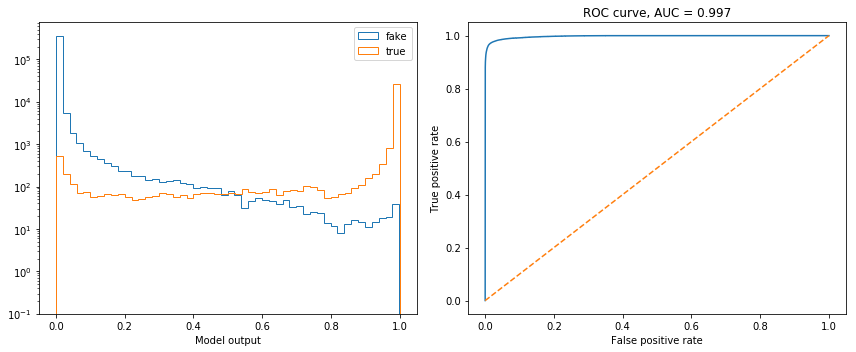

In [12]:
iteration = 13010
odd, tdd = model(iteration)

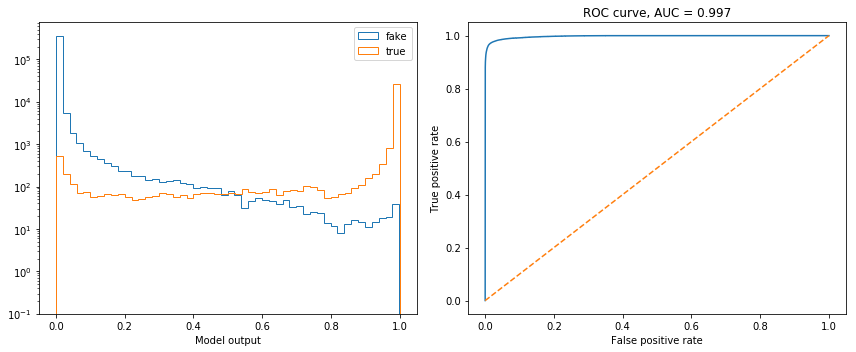

In [17]:
import sklearn.metrics
import matplotlib.pyplot as plt
y_pred, y_true = (odd > 0.5), (tdd > 0.5)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_true, odd)


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12,5))

# Plot the model outputs
# binning=dict(bins=50, range=(0,1), histtype='step', log=True)
binning=dict(bins=50, histtype='step', log=True)
ax0.hist(odd[y_true==False], label='fake', **binning)
ax0.hist(odd[y_true], label='true', **binning)
ax0.set_xlabel('Model output')
ax0.legend(loc=0)

# Plot the ROC curve
auc = sklearn.metrics.auc(fpr, tpr)
ax1.plot(fpr, tpr)
ax1.plot([0, 1], [0, 1], '--')
ax1.set_xlabel('False positive rate')
ax1.set_ylabel('True positive rate')
ax1.set_title('ROC curve, AUC = %.3f' % auc)

plt.tight_layout()
plt.savefig("roc_graph_nets.eps")

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_small_decoder_001/bak/checkpoint_24869.ckpt
Accuracy:  0.9771
Precision: 0.9583
Recall:    0.9605


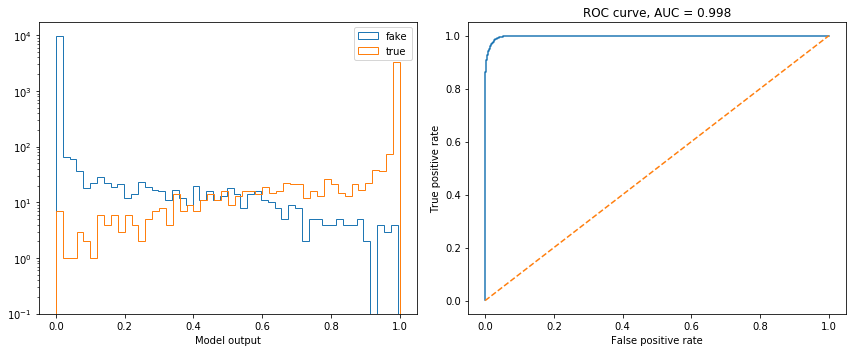

In [12]:
iteration = 24869
odd, tdd = model(iteration)
plot_metrics(odd, tdd, odd_th=0.5)